In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [84]:
names = [x.split("-") for x in features['sound.files']]
print([x[1] == "mystery" for x in names].count(True))

73


In [2]:
def old_add_metadata(metadata, features):
    names = [x.split("-") for x in features[0]]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    return ordered_metadata.join(features)

In [88]:
def add_metadata(metadata, features):
    names = [x.split("-") for x in features['sound.files']]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    X = ordered_metadata.join(features)
    good_rows = features.iloc[:,1:].apply(lambda x : not np.any(np.isnan(x)), axis = 1)
    mystery_rows = [x[0] == "Mystery" or x[0] == "Sonus" for x in names]
    return X[[a and not b for a,b in zip(good_rows,mystery_rows)]]

In [4]:
#2d PCA plotting
def _2d_plot_pca(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=2)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

In [5]:
#3d PCA plotting
def _3d_plot_pca(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=3)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [6]:
#2d LDA plotting
def _2d_plot_lda(species, X, y): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components = 2)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

In [7]:
#3d LDA plotting
def _3d_plot_lda(species, X, y): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [8]:
features = pd.read_csv('C:/Users/Caleb Dilsavor/Desktop/bird/Bird/notebooks/feature_vector.csv',header = None, names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25","freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR","skew","kurt","sp.ent","time.ent","entropy","sfm","meandom","mindom","maxdom","dfrange","modindx","startdom","enddom","dfslope","meanpeakf"
])
metadata = pd.read_csv('C:/Users/Caleb Dilsavor/Desktop/bird/Bird/notebooks/USA_Texas_A.csv', encoding = "ISO-8859-1")

In [87]:
good_boi = add_metadata(metadata,features)

0


In [92]:
species = good_boi.English_name
y = species.astype("category").cat.codes
X = good_boi.iloc[:,18:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [13]:
#model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=20000)
#model.fit(X_train,y_train);
#model.score(X_test,y_test)

In [93]:
model = LinearDiscriminantAnalysis(n_components = 2)
model.fit(X_train,y_train);
model.score(X_test,y_test)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.29246388129636863

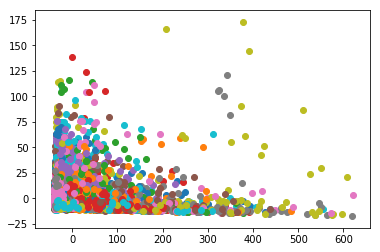

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


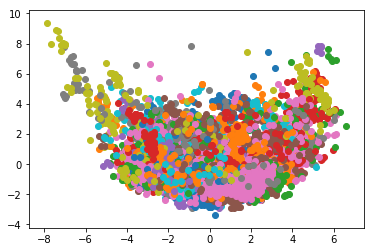

In [15]:
_2d_plot_pca(species,X)
_2d_plot_lda(species,X,y)

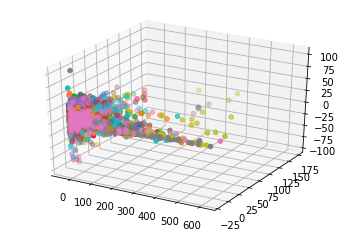

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


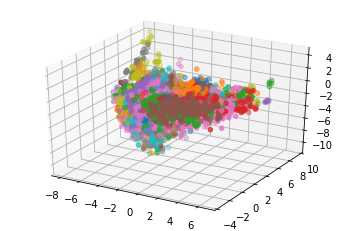

In [16]:
_3d_plot_pca(species,X)
_3d_plot_lda(species,X,y)

In [42]:
#Comparing with normalized
nX = pd.DataFrame.from_records(preprocessing.normalize(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, y, random_state=1)

In [20]:
#Comparing with normalized
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train);
print(model.score(X_test,y_test))

model = LinearDiscriminantAnalysis()
model.fit(nX_train,ny_train);
print(model.score(nX_test,ny_test))

0.27880184331797236
0.23655913978494625


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [98]:
#Comparing with just using species with a lot of data
counts = good_boi.groupby('English_name').count()
#good_names = counts[counts.Recording_ID >= 100].index
good_names = counts.sort_values(by='Recording_ID').iloc[:10,:].index
filtered_boi = good_boi[[x.English_name in good_names for i,x in good_boi.iterrows()]]

In [120]:
#Comparing with just using species with a lot of data
fspecies = filtered_boi.English_name
fy = fspecies.astype("category").cat.codes
fX = filtered_boi.iloc[:,18:]
fX_train, fX_test, fy_train, fy_test = train_test_split(fX, fy, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [121]:
#Comparing with just using species with a lot of data
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train);
print(model.score(X_test,y_test))

model = LinearDiscriminantAnalysis(n_components = 3)
model.fit(fX_train,fy_train);
model.score(fX_test,fy_test)

0.2932448262397501


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1.0

In [46]:
#Comparing with trying to only guess genus instead of species
genus = good_boi.Genus
gy = genus.astype("category").cat.codes
gX = X
gX_train, gX_test, gy_train, gy_test = train_test_split(gX, gy, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [101]:
#Comparing with trying to only guess genus instead of species
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train);
print(model.score(X_test,y_test))

model = LinearDiscriminantAnalysis(n_components = 3)
model.fit(gX_train,gy_train);
model.score(gX_test,gy_test)

0.28426395939086296


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.3102918586789555

In [118]:
#Comparing with both trying to only guess genus instead of species and just using species with a lot of data
genus = filtered_boi.Genus
fgy = genus.astype("category").cat.codes
fgX = fX
fgX_train, fgX_test, fgy_train, fgy_test = train_test_split(fgX, fgy, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [119]:
#Comparing with both trying to only guess genus instead of species and just using species with a lot of data
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train);
print(model.score(X_test,y_test))

model = LinearDiscriminantAnalysis(n_components = 3)
model.fit(fgX_train,fgy_train);
model.score(fgX_test,fgy_test)

0.2983209683717298


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.7777777777777778

In [109]:
genus.unique().shape

(10,)